In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import quad, fixed_quad, quadrature

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=[18, 11]

In [3]:
#Create empty class of formulas A2.*
class formulas_A2:
  def show(self):
    return self.__dict__

# Создается абсолютно пустой Инстанс (экземпляр) 'A2'
# Приобретать свои свойства он будет по мере уточнения методики расчётов
A2=formulas_A2()
#;
A2.show()

{}

# 1: Calculation of the elastic compliance from ASTM1820 (A2.10 and A2.11)

<img src="photo_2018-10-31_16-04-39.jpg" height="420" width="420"  />

$$
C_{LL(i)}= {\frac 1{E\cdot B_e}}\left(\frac {W+a_i}{W-a_i}\right)^2
\left[
2.1630+12.219\left(\frac {a_i}W\right)
-20.065\left(\frac {a_i}W\right)^2
-0.9925\left(\frac {a_i}W\right)^3
+20.609\left(\frac {a_i}W\right)^4
-9.9314\left(\frac {a_i}W\right)^5
\right]
\qquad(A2.10) 
\\
\\
\boldsymbol{where:} \\
B_e = B-\frac{(B-B_N)^2}B \;mm
\qquad\qquad\qquad\qquad\qquad\qquad(A2.11)
\\
\\
$$
___
$$
B = 12.5 \;mm \\
B_N = 0.8 \cdot\;B \\
E = 190 000 \;MPa = 195 000 \;\frac N {{mm}^2} \\
W = 25\;mm \\
$$

In [4]:
#Вводим в оборот формулы А2.10 и А2.11
def __(self, ai): #(A2.10)  
  #вводим константы для (A2.10)
  self.B= 12.5
  self.BN= 0.8*self.B
  self.Be= self.B - ((self.B-self.BN)**2)/self.B # (A2.11)
  self.E= 190000.
  self.W= 25.

  self.ai = ai + 15.5 #?
  ai_w = self.ai/self.W
  return (2.1630 + 12.219*ai_w - 20.065*ai_w**2 - 0.9925*ai_w**3 + 20.609*ai_w**4 - 9.9314*ai_w**5) * \
    ( (self.W+self.ai)/(self.W-self.ai) )**2./(self.E*self.Be)
  #

formulas_A2._10 = __      # добавляем метод в Класс 'formulas_A2'

# ТЕСТ: юзаем метод для уже существующего Инстанса(экземпляра) 'A2' (test)
print A2.show()
A2._10(0.), 

{}


(3.1284561390208e-05,)

In [5]:
#Вводим в оборот метод чтения данных и строим интерполяторы
from scipy.interpolate import interp1d

def __(self, *args):
  #args[0] force_dat file name
  #args[1] cracklength file name
  #args[2] True|Empty: reduce of cracklength else: not reduce
  
  self.forcedat = args[0]
  self.cracklength = args[1]
  self.reduce_crack = True
  if len(args)>2:
    self.reduce_crack = args[2]

  #загружаем "forcedat file" и формируем его интерполятор:
  self.force = np.loadtxt(self.forcedat, dtype=np.float)
  self.force_interp = interp1d(self.force[:,1],self.force[:,2], bounds_error=False)

  #загружаем, редуцируем(если self.reduce_crack) и модифицируем "cracklength file":
  crk=[]
  for xx in np.loadtxt(self.cracklength, dtype=np.float):
    if self.reduce_crack:
      if xx[1]:
        crk.append([xx[1], self._10(xx[1])])
    else:
      crk.append([xx[1], self._10(xx[1])])
  self.crack=np.asarray(crk)

  #интерполяторы редуцированного массива crack:
  self.crack_interp = interp1d(self.crack[:,0],self.crack[:,1], bounds_error=False)
  self.crack_cmode_interp = interp1d(self.crack[:,0], self.force[:,1][- len(self.crack): ], bounds_error=False)
  #
formulas_A2.read=__ #добавляем метод в Класс 'formulas_A2'
 
# Юзаем метод для уже существующего Инстанса(экземпляра) 'A2'
A2.read("FORCE_CMOD_U820x.dat", "crack-length_U820x.dat", True)

#;
A2.show()

{'B': 12.5,
 'BN': 10.0,
 'Be': 12.0,
 'E': 190000.0,
 'W': 25.0,
 'ai': 18.025830336,
 'crack': array([[7.44254670e-02, 3.18614032e-05],
        [1.33744032e-01, 3.23316784e-05],
        [1.59770244e-01, 3.25410308e-05],
        [1.72973692e-01, 3.26479523e-05],
        [1.99560481e-01, 3.28647257e-05],
        [1.99087913e-01, 3.28608554e-05],
        [2.11757828e-01, 3.29648401e-05],
        [2.24409988e-01, 3.30691324e-05],
        [2.24401016e-01, 3.30690583e-05],
        [2.37718965e-01, 3.31793307e-05],
        [2.37445453e-01, 3.31770610e-05],
        [2.50850666e-01, 3.32885584e-05],
        [2.50514196e-01, 3.32857535e-05],
        [2.63761671e-01, 3.33964348e-05],
        [2.76988616e-01, 3.35074521e-05],
        [2.76446507e-01, 3.35028920e-05],
        [2.89512554e-01, 3.36130390e-05],
        [2.88947526e-01, 3.36082655e-05],
        [3.02162073e-01, 3.37201518e-05],
        [3.01680672e-01, 3.37160668e-05],
        [3.14946808e-01, 3.38288893e-05],
        [3.14513973e-0

# 1a: creation of the plot $\vartriangle$ a vs. calculated compliance (Cc)

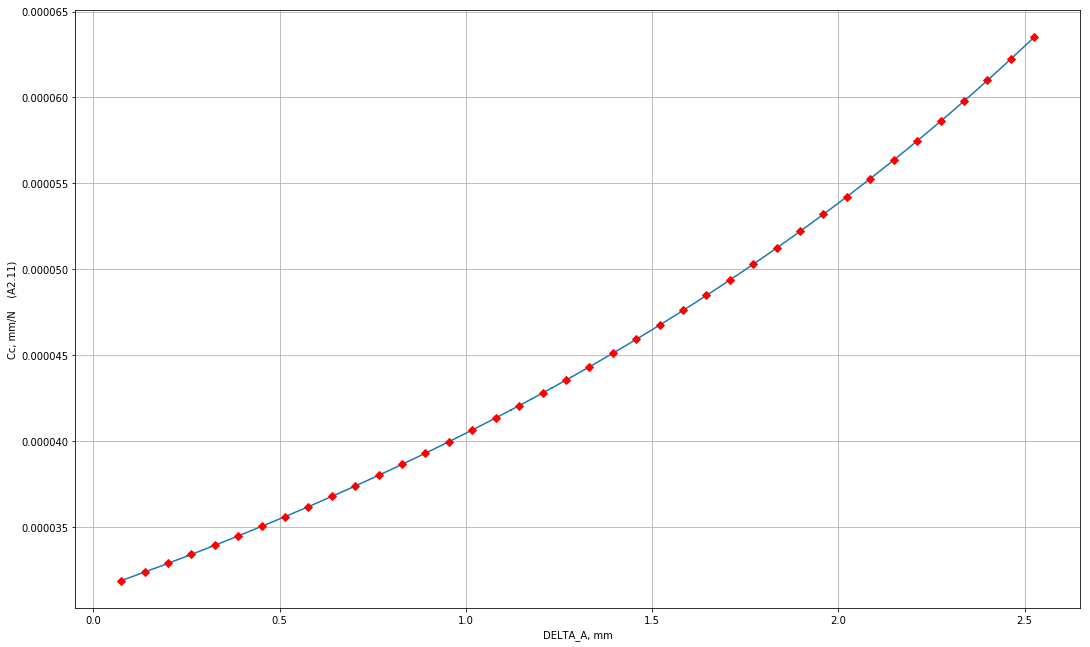

In [12]:
# сплошная линия построена по данным МАССИВА A2.crack
# контрольные точки построены через функцию-интерполятор массива (A2.crack_interp)
%matplotlib inline

plt.rcParams["figure.figsize"]=[18, 11]
plt.plot(A2.crack[:,0],A2.crack[:,1])
plt.xlabel('DELTA_A, mm')
plt.ylabel('Cc, mm/N    (A2.11)')
for _ in np.linspace(A2.crack[:,0][0], A2.crack[:,0][-1], num=40):
  plt.plot(_, A2.crack_interp(_), 'rD')
plt.grid()
plt.show()

# 1b: creation of the plot F vs. CMOD from Code_Aster simulation

In [ ]:
# сплошная линия построена по данным МАССИВА A2.force[]
# контрольные точки построены через функцию-интерполятор массива "A2.force_interp()"
plt.plot(A2.force[:,1], A2.force[:,2])
plt.xlabel('CMOD, mm')
plt.ylabel('FORCE, N')

for _ in np.linspace(A2.force[:,1][0], A2.force[:,1][-1], num=40):
  plt.plot(_, A2.force_interp(_), 'rx') # second point
plt.grid()
plt.show()

# 1c: creation of the plot CMOD vs. $\vartriangle$ a 

In [ ]:
##TEST
plt.plot(A2.crack[:,0], A2.force[:,1][-len(A2.crack) : ])

sht = pd.read_excel(pd.ExcelFile('1757-A52.xls'),'J, Delta a(p)')
xlsm_ = np.transpose(np.asarray((sht.iloc[5:-1,3].values.astype(float), sht.iloc[5:-1,5].values.astype(float))))
plt.plot(xlsm_[:,0], xlsm_[:,1], 'rP')

plt.xlabel('DELTA_A, mm')
plt.ylabel('CMOD, mm')
for _ in np.linspace(A2.crack[:,0][0], A2.crack[:,0][-1], num=40):
  plt.plot(_, A2.crack_cmode_interp(_), 'mv') # second point

plt.grid()
plt.show()
xlsm_

# 1d: creation of the intersection of the calculated compliance (Cc) with Force-CMOD curve and calculation of the Apl

In [ ]:
def __(self, delta):
  self.delta=delta
  cc_ = 1./self.crack_interp(delta).item()
  cmode_ = self.crack_cmode_interp(self.delta).item()
  self.cc_ = cc_
  self.cmode_ = cmode_
  
  y1_ = self.force_interp(cmode_).item()
  self.P = y1_
  x1_ = cmode_ - self.P / cc_
  
  self.apl= quad(self.force_interp, self.force[:,1][0], cmode_)[0] \
    - self.P * (cmode_ - x1_) * 0.5


  return (x1_, 0.0), (cmode_, y1_)
    #
formulas_A2.Apl=__  # добавляем метод 'Apl' в class 'formulas_A2'

# юзаем метод 'Apl' в объекте 'A2' (test)
print "Нижняя точка: %r; Верхняя точка: %r; " % A2.Apl(2.52)
print "Площадь(A2.apl)=%r" % A2.apl 

In [ ]:
plt.plot(A2.force[:,1], A2.force[:,2])
A_= A2.Apl(0.8)

plt.plot(A_[0][0],  A_[0][1],'ro') # Нижняя точка
plt.plot(A_[1][0],  A_[1][1],'ro') # Верхняя точка
plt.plot([A_[0][0], A_[1][0]], [0.0, A_[1][1]], 'ro--')


plt.fill_between(A2.force[:,1], A2.force[:,2], 0.0 ,\
                 where=(A2.force[:,1] <= A_[1][0]), \
                 color='grey', alpha='0.5', hatch="/")
plt.fill_between(A2.force[:,1], A2.cc_*(A2.force[:,1]-A_[0][0]), 0.0 ,\
                 where=(A2.force[:,1] > A_[0][0]) & (A2.force[:,1] < A_[1][0]), \
                 color='white', alpha='1.5', hatch="\\")

plt.xlabel('CMOD, mm')
plt.ylabel('FORCE, N')
plt.grid()
plt.rcParams["figure.figsize"]=[18, 11]
plt.show()

print "A2.delta=%r" % A2.delta
print "Нижняя точка: %r; Верхняя точка: %r; " % A_
print "Площадь:", quad(A2.force_interp, A2.force[:,1][0], A2.cmode_)[0],"-",A2.P * (A2.cmode_ - A_[0][0]) * 0.5,"=",A2.apl 

# 1e: extraction from the experimental file the LOAD-CMOD curve

In [ ]:
sht=pd.read_excel(pd.ExcelFile('1757-A52.xls'),'Channels by Ste')
sht.iloc[2:,2].values, sht.iloc[2:,1].values

In [ ]:
sht=pd.read_excel(pd.ExcelFile('1757-A52.xls'),'Channels by Ste')
xlsm_ = np.transpose(np.asarray((sht.iloc[2:,2].values,sht.iloc[2:,1].values)))

xlsm_,  xlsm_[:,0], xlsm_[:,1]

# 1f: creation of the plot FORCE vs CMOD for experiment and simulation

In [ ]:
plt.plot(A2.force[:,1], A2.force[:,2])
A_= A2.Apl(2.52)

plt.plot(A_[0][0],  A_[0][1],'ro') # Нижняя точка
plt.plot(A_[1][0],  A_[1][1],'ro') # Верхняя точка
plt.plot([A_[0][0], A_[1][0]], [0.0, A_[1][1]], 'ro--')

plt.plot( xlsm_[:,0], xlsm_[:,1])

plt.xlabel('CMOD, mm')
plt.ylabel('FORCE, N')
plt.grid()
plt.rcParams["figure.figsize"]=[18, 11]
plt.show()
A_

# 2a: Calculation of the Jpl according to the ASTM1820 (basic method)

$$
J_{pl(i)}= 
\frac{\eta_{pl} A_{pl}}{B_N b_0}
\qquad(A2.6) 
\\
\boldsymbol{where:} \\
\eta_{pl}=2+0.522\frac{b_{0}}{W}\\
A_{pl} \Longrightarrow 1d \\
b_0=W-a_0 \\
\\
\\
a_0=15.2 +\vartriangle a \\
B = 12.5 \;mm \\
B_N = 0.8 \cdot\;B \\
W = 25\;mm \\
$$ 

# 2a bis: Correction of Jpl for the crack propagation 

$$
coef= \left[
1-\frac{(0.75\eta_{pl}-1)\vartriangle a}{W-a_0} \right] \\
\\
J_{pl(GFR)}= J_{pl(i)}*coeff
$$ 

In [ ]:
def __(self, *args): #(A2.6)
    if len(args):
      self.a0 = args[0]
      
    b_0 = self.W - self.a0
    
    nu_ = (2.+0.522*b_0/self.W)
    self.jpl = nu_*self.apl/(self.BN*b_0)
    
    coe_ = 1. - ((0.75*nu_ - 1.)*self.delta)/(self.W - self.a0)
    self.jplcor = self.jpl * coe_
    #
formulas_A2.Jpl = __   # добавляем метод в class 'formulas_A2'
A2.Jpl(15.2)           # юзаем метод в объекте 'A2' (test)
"A2.jpl=%r, A2.jplcor=%r" % (A2.jpl, A2.jplcor)

# 2b: Calculation of the Jpl according to the ASTM1820 (incremental version)

$$
J_{pl(i)}= \left[
J_{pl(i-1)}+
\left(
\frac{\eta_{pl(i-1)}}
{b_{(i-1)}}
\right)
{\frac {A_{pl(i)}-A_{pl(i-1)}}{B_N}}
\right]
\left[
1-\gamma_{(i-1)} 
\left(
\frac{a_{(i)}-a_{(i-1)}}{b_{(i-1)}}
\right)
\right] \qquad(A2.8) 
\\
\boldsymbol{where:} \\
\eta_{pl(i-1)}=2+0.522\frac{b_{(i-1)}}{W}
\\
\gamma_{(i-1)}=1.0+0.76\frac{b_{(i-1)}}{W}
A_{pl} \Longrightarrow 1d \\
b_{(i-1)}=W-a_{(i-1)} \\
$$

$$
B = 12.5 \;mm \\
B_N = 0.8 \cdot\;B \\
W = 25\;mm \\
a_i=15.2 +\vartriangle a
$$ 

# 3: Calculation of the Jel according to the ASTM1820


$$
J_{el}= {\frac {K^2 (1-\nu^2)}{E}} \qquad(A2.4)
\\
\boldsymbol{where:} \\
\\
K_i= {\frac {P_i}{(B B_N W)^{1/2}}}f \left(\frac {a_i}W\right) \qquad(A2.2) 
\\
f\left(\frac {a_i}W\right) = \frac {\left(2+\frac {a_i}W \right)
\left[0.886 + 4.64 \left(\frac {a_i}W \right)-13.32\left(\frac {a_i}W \right)^2 + 14.72\left(\frac {a_i}W \right)^3-5.6\left(\frac {a_i}W \right)^4
\right]
}{\left(1-\frac {a_i}W \right)^{3/2}} \qquad(A2.3) \\
E=195 000 MPa
$$ 


In [ ]:
def __(self):
  self.nu = 0.3
#  ai_w=(self.delta+15.2)/self.W
  ai_w=0.6
  fi= ((2.0+ai_w)*(0.886 + 4.64*ai_w - 13.32*ai_w**2 + 14.72*ai_w**3 - 5.6*ai_w**4)) / (1-ai_w)**1.5
  Ki=  (self.P * fi) /(self.BN*self.BN*self.W)**0.5
  self.jel= Ki*Ki*(1-self.nu**2)/self.E
  
formulas_A2.Jel = __


A2.Jel()
A2.jel 

# 4: Calculation of the total energy J

$$
J_{total} = J_{pl}+J_{el}
\qquad(A2.5)
$$


In [ ]:
def __(self):
  self.total = self.jpl + self.jel
  self.totalcor = self.jplcor + self.jel
formulas_A2.Jtotal = __

A2.Jtotal()
print "A2.jpl, A2.jplcor, A2.jel, A2.total, A2.totalcor:"
print A2.jpl, A2.jplcor, A2.jel, A2.total, A2.totalcor

In [ ]:
def __(self, *args):    
  if len(args)==0: # last time
    self.JR=np.asarray(self.JR)
    return     
  if (args[0])==None: # first time 
    self.JR= []
    return
  # next time
  self.Apl(args[0])
  self.Jpl()
  self.Jel()
  self.Jtotal()        
  self.JR.append([self.delta, self.total, self.totalcor])
  #
formulas_A2.makeJTotal = __
A2.makeJTotal(None)

In [ ]:
sht=pd.read_excel(pd.ExcelFile('1757-A52.xls'),'GFR')
xlsm_ = np.transpose(np.asarray((sht.iloc[2:,2].values,sht.iloc[2:,3].values)))

xlsm_

In [ ]:
##TEST
A2.makeJTotal(None)# init
for _ in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]:
  try:
    A2.makeJTotal(_) #continue
  except:
    continue
A2.makeJTotal()#end

A2.JR

In [ ]:
#A2.makeJTotal(None)
_sheet =[]
for _ in xlsm_:
  if _[0]<A2.crack[:,0][0]:
    continue
  if _[0]>A2.crack[:,0][-1]:
    break
  try:
    #A2.makeJTotal(_[0])
    _sheet.append([_[0],_[1]])
    print _
  except:
    continue
#A2.makeJTotal()
_sheet = np.asarray(_sheet)
A2.JR

In [ ]:
#EXCLUSION LINE BUILDING:
A2.JRtrend0= np.poly1d(np.polyfit(A2.JR[:,0], A2.JR[:,1], 2)) # исходный тренд
A2.JRtrend0cor= np.poly1d(np.polyfit(A2.JR[:,0], A2.JR[:,2], 2)) # исходный тренд с коррекцией

class rootexline:
  def __init__(self,k,trend):
    self.k = k
    self.trend = trend
  def value(self,x1,x):
    return self.k*(x-x1)
  def calc(self,x1):
    xx1 = fsolve(lambda x:self.trend(x) - self.value(x1,x), x1)
    return xx1[0],self.value(x1,xx1[0])
  #

root0 = rootexline(1101, A2.JRtrend0)
roots0=root0.calc(0.15), root0.calc(1.5)
JR0=A2.JR[(A2.JR[:,0] > roots0[0][0])]
JR1=JR0[JR0[:,0]<roots0[1][0]]


A2.JRtrend1= np.poly1d(np.polyfit(JR1[:,0], JR1[:,1], 2)) # урезанный тренд
A2.JRtrend1cor= np.poly1d(np.polyfit(JR1[:,0], JR1[:,2], 2)) # урезанный тренд

root1=rootexline(1101,A2.JRtrend1)
roots1=root1.calc(0.2)

root1cor=rootexline(1101,A2.JRtrend1cor)
roots1=root1cor.calc(0.2)

print roots0
print JR1
print roots1

In [ ]:
plt.plot(_sheet[:,0], _sheet[:,1], 'ro')
plt.plot(A2.JR[:,0], A2.JR[:,1], 'bo')
plt.plot(JR1[:,0], A2.JRtrend1(JR1[:,0]), 'r--',)
plt.plot(JR1[:,0], A2.JRtrend1cor(JR1[:,0]), 'd-.',)

root0=rootexline(1101,A2.JRtrend0)
xy1=root0.calc(0.15)
plt.plot([0.15,xy1[0]], [0.0, xy1[1]], 'm-')
xy2=root0.calc(1.5)
plt.plot([1.5,xy2[0]], [0.0, xy2[1]], 'm-')

root1=rootexline(1101,A2.JRtrend1cor)
xy1=root1.calc(0.2)
plt.plot([0.2, xy1[0]], [0.0, xy1[1]], 'g-')

bb_=dict(boxstyle="round4,pad=.5", fc="0.9")

plt.annotate(("%f\n%f" % xy1), xy=xy1, xytext=(0.2, xy1[1]+50.), \
             arrowprops=dict(arrowstyle="->"), bbox=bb_)
plt.annotate(("%f\n%f" % xy2), xy=xy2, xytext=(1.5, xy2[1]-10.), \
             arrowprops=dict(arrowstyle="->"), bbox=bb_)

xy2 = [fsolve(lambda x:A2.JRtrend1(x) - 1101*(x-0.2), 0.2)[0],None]
xy2[1] = 1101*(xy2[0]-0.2)

plt.plot(xy2[0],xy2[1], 'gX')


plt.annotate(("%f\n%f" % tuple(xy2)), xy=xy2, xytext=(xy2[0], xy2[1]-50.), \
             arrowprops=dict(arrowstyle="->"), bbox=bb_)

plt.grid()
plt.rcParams["figure.figsize"]=[14, 9.]


plt.legend(('EXPERIMENTAL POINTS','SIMULATION POINTS', 'A2.JRtrend1(JR1[:,0])', \
            'A2.JRtrend1cor(JR1[:,0])',  \
            '$EXCLUSION \quad LINE \quad LEFT = 1101 \cdot\; (x-0.15)$', \
            '$EXCLUSION \quad LINE \quad RIGHT = 1101 \cdot\; (x-1.5)$', \
            '$OFFSET \quad LINE = 1101\cdot\;(x-0.2)$'))

plt.show()
A2.xy1 = xy1
A2.xy2 = tuple(xy2)
A2.xy1,A2.xy2

### Сохранить результат в файле ASTM1820.log

In [ ]:
#Сохранить результат в файле ASTM1820.log
!echo {A2.forcedat} {A2.cracklength} {A2.xy1[0]} {A2.xy1[1]} {A2.xy2[0]} {A2.xy2[1]} >> ASTM1820.log
!cat ASTM1820.log

   # 5: Creation of the J-R curve

Угол наклона Exclusion line: y=1140*x

<img src="J_R_curve.png" height="420" width="620"  />

on the J-R curve we plot:

y: $$J_{total}$$
x: $$ \vartriangle a $$

---
## Очистить файл ASTM1820.log

In [ ]:
#Очистить файл ASTM1820.log
!echo ""
!echo 'FORCE_CMOD_*.dat | crack-length_*.dat | x1 | y1 | x2 | y2' >  ASTM1820.log
!!echo $x{0..62}"=" >> ASTM1820.log
!cat ASTM1820.log